### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor

# Dataset
- Attribute Information
    - V1. variance of Wavelet Transformed image (continuous)
    - V2. skewness of Wavelet Transformed image (continuous)
    - V3. curtosis of Wavelet Transformed image (continuous)
    - V4. entropy of image (continuous)
    - Class (target). Presumably 1 for genuine and 2 for forged

In [2]:
# dataset = pd.read_csv("../dataset/Banknote-authentication-dataset-week5.csv")
dataset = pd.read_csv("../dataset/Banknote-authentication.csv")
dataset.head()

,V1,V2,V3,V4,Class
0,3.62160,8.6661,-2.8073,-0.44699,1
1,4.54590,8.1674,-2.4586,-1.46210,1
2,3.86600,-2.6383,1.9242,0.10645,1
3,3.45660,9.5228,-4.0112,-3.59440,1
4,0.32924,-4.4552,4.5718,-0.98880,1


In [3]:
dataset['Class'].value_counts()/dataset.shape[0]*100

Class
1    55.539359
2    44.460641
Name: count, dtype: float64

In [4]:
dataset.describe()

,V1,V2,V3,V4,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,1.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,1.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,1.000000
50%,0.496180,2.319650,0.616630,-0.586650,1.000000
75%,2.821475,6.814625,3.179250,0.394810,2.000000
max,6.824800,12.951600,17.927400,2.449500,2.000000


In [5]:
# dataset to test four attributes
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [6]:
# train and test split
Xtrain, Xval, ytrain, yval = train_test_split(X, y, train_size=.7, random_state=0)
Xtrain.shape, Xval.shape, ytrain.shape, yval.shape

((960, 4), (412, 4), (960,), (412,))

# Testing feature selection

In [7]:
k_vs_score = []
for k in range(2, 5, 1):
    selector = SelectKBest(score_func=f_regression, k=k)

    Xtrain_2 = selector.fit_transform(Xtrain, ytrain)# compute correlation and select
    Xval_2 = selector.transform(Xval)# just transform

    mdl = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0)# abritary for study. Default hyperparamenters once the dataset set is short.
    mdl.fit(Xtrain_2, ytrain)

    p = mdl.predict(Xval_2)

    score = mean_absolute_error(yval, p)
    print(f"k = {k} - MAE = {score}")

    k_vs_score.append(score)

k = 2 - MAE = 0.07191747572815535
k = 3 - MAE = 0.02160194174757282
k = 4 - MAE = 0.020849514563106797


<Axes: >

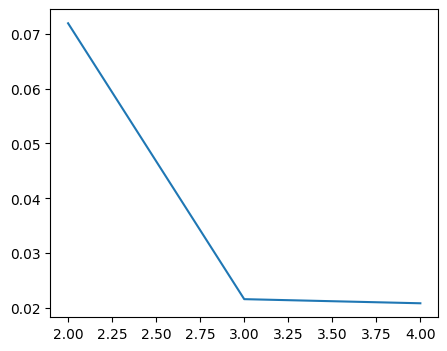

In [8]:
pd.Series(k_vs_score, index=range(2, 5, 1)).plot(figsize=(5,4))

In [9]:
# A set of 3 from 4 attributes are relevants
selector = SelectKBest(score_func=f_regression, k=3)
Xtrain_2 = selector.fit_transform(Xtrain, ytrain)

mask = selector.get_support()
# Xval.iloc[:, mask]# return attrs and its values
Xval.columns[mask]# returns just the attrs

Index(['V1', 'V2', 'V3'], dtype='object')

V1    1050.159744
V2     213.614155
V3      16.416700
V4       1.378086
dtype: float64


<Axes: >

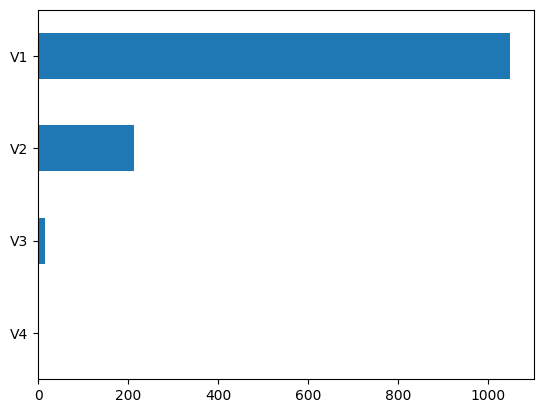

In [10]:
# position of f_score among the attrs
print(pd.Series(selector.scores_, index=Xtrain.columns))
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().plot.barh()

Acording to this test, we can note the reason of the previous lecture recommend to use the simplified banknote dataset. The simplified dataset contains the two most relevant attributes: V1 (variance information) and V2 (skewness information). Since we have a better understanding about this dataset, now we can explore how this attributes interfers on clustering.

# Visualize data

In [11]:
scaler = MinMaxScaler() 
dataset_scaled = scaler.fit_transform(dataset) 
dataset_scaled = pd.DataFrame(dataset_scaled, columns=dataset.columns,index=dataset.index)
# dataset_scaled.describe()

## Plotting

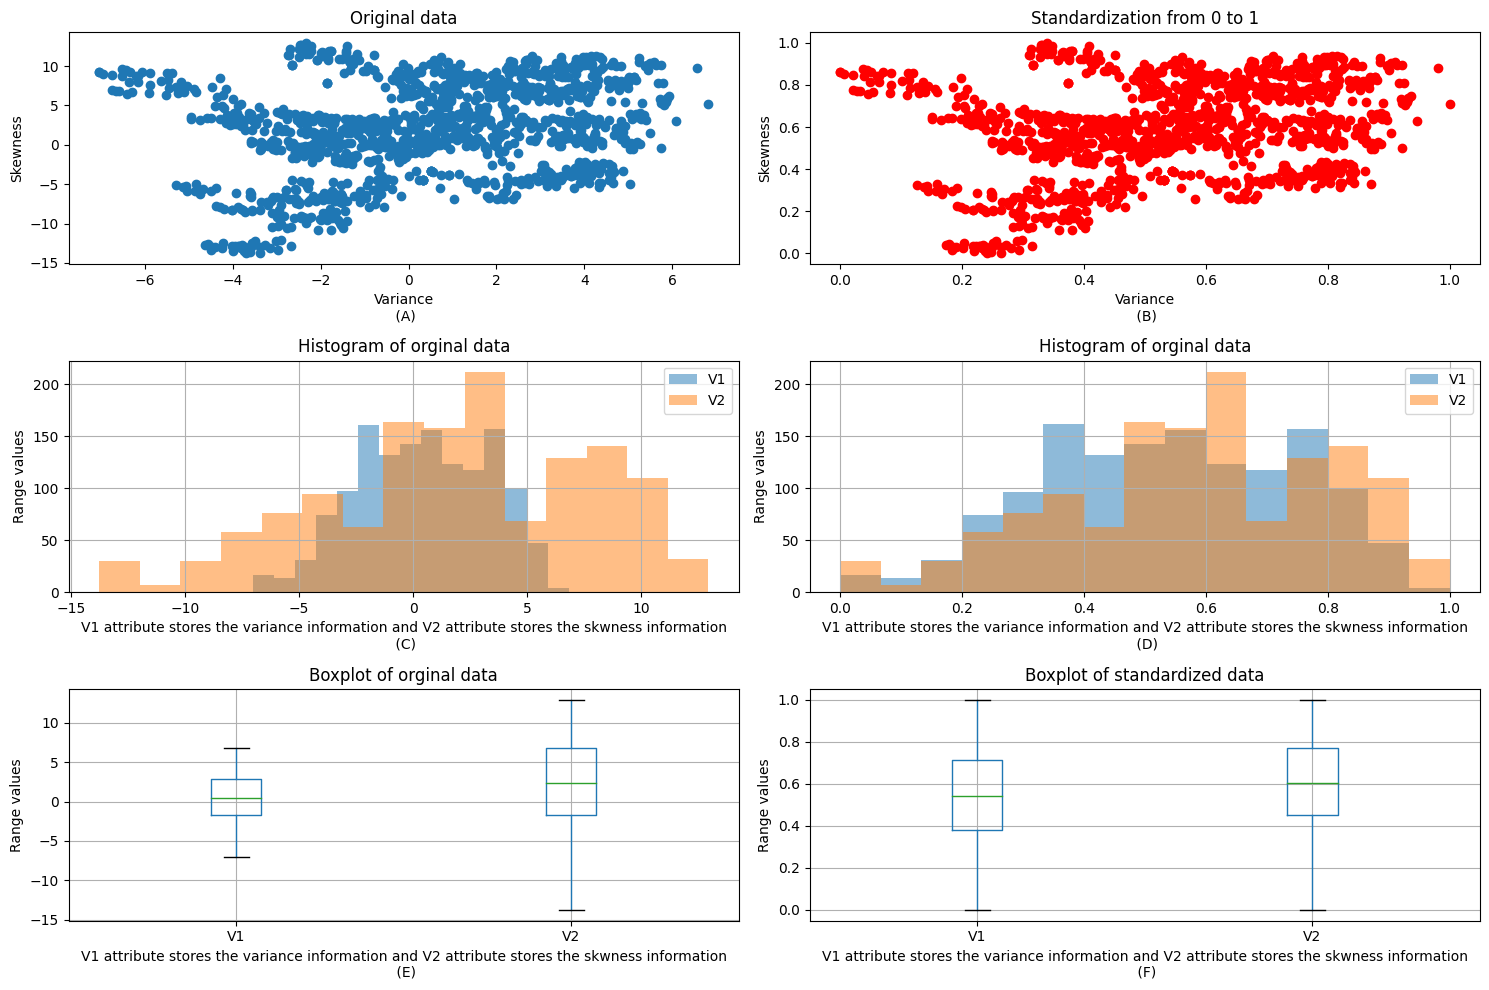

In [12]:
#plt.figure(figsize=(15,8))
plt.figure(figsize=(15,10))
#plt.tight_layout()
plt.subplot(3,2,1)
# plt.tight_layout()
plt.scatter(x= dataset['V1'], y= dataset['V2'])
plt.title('Original data')
plt.xlabel('Variance\n (A)')
plt.ylabel('Skewness')

plt.subplot(3,2,2)
plt.scatter(x= dataset_scaled['V1'], y= dataset_scaled['V2'], color='r')
plt.title('Standardization from 0 to 1')
plt.xlabel('Variance\n (B)')
plt.ylabel('Skewness')

plt.subplot(3,2,3)
# dataset.boxplot(column=['V1', 'V2'])
# dataset.hist(column=["V1","V2"], alpha=0.5,layout=(1,2))
dataset["V1"].hist(bins=15,alpha=0.5)
dataset["V2"].hist(bins=15,alpha=0.5)
plt.legend(["V1","V2"])
plt.title('Histogram of orginal data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skewness information\n (C)')
plt.ylabel('Range values')

plt.subplot(3,2,4)
# dataset.boxplot(column=['V1', 'V2'])
# dataset_scaled.hist(alpha=0.5)
dataset_scaled["V1"].hist(bins=15,alpha=0.5)
dataset_scaled["V2"].hist(bins=15,alpha=0.5)
plt.legend(["V1","V2"])
plt.title('Histogram of standardized data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skewness information\n (D)')
plt.ylabel('Range values')

plt.subplot(3,2,5)
dataset.boxplot(column=['V1', 'V2'])
plt.title('Boxplot of orginal data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skewness information\n (E)')
plt.ylabel('Range values')

plt.subplot(3,2,6)
dataset_scaled.boxplot(column=['V1', 'V2'])
plt.title('Boxplot of standardized data')
plt.xlabel('V1 attribute stores the variance information and V2 attribute stores the skewness information\n (F)')
plt.ylabel('Range values')

plt.tight_layout()
# plt.show()


## Plotting with class

[]

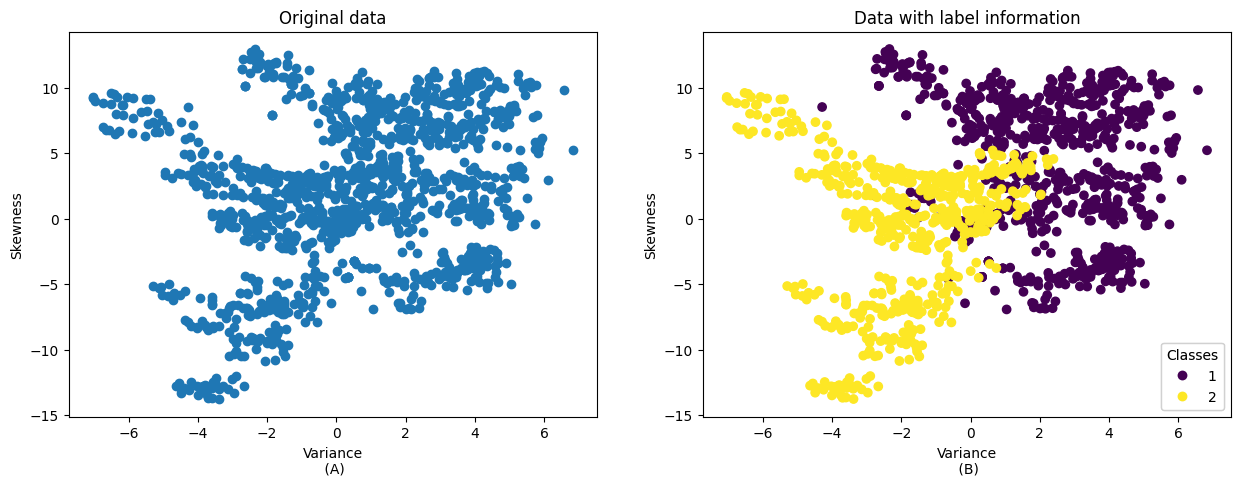

In [13]:
colormap = np.array(['r','g','b'])


# plt.figure(figsize=(15,10))
# plt.subplot(3,2,1)
# plt.scatter(x= dataset['V1'], y= dataset['V2'])
# plt.title('Original data')
# plt.xlabel('Variance\n (A)')
# plt.ylabel('Skewness')

# plt.subplot(3,2,2)
# plt.scatter(x= dataset['V1'], y= dataset['V2']
#             # ,color='r'
#             ,c=colormap[np.array(y)])
# plt.title('Data with label information')
# plt.xlabel('Variance\n (B)')
# plt.ylabel('Skewness')
# # legend = 

# plt.tight_layout()


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((15,5))
ax1.scatter(x=dataset['V1'], y=dataset['V2'])
ax1.set_title('Original data')
ax1.set_xlabel('Variance\n (A)')
ax1.set_ylabel('Skewness')

l2 = ax2.scatter(x=dataset['V1'], y=dataset['V2'], c=np.array(y))
legend = ax2.legend(*l2.legend_elements(),loc="lower right", title="Classes")
ax2.add_artist(legend)
ax2.set_title('Data with label information')
ax2.set_xlabel('Variance\n (B)')
ax2.set_ylabel('Skewness')

plt.plot()


# Clustering

In [14]:
from sklearn.metrics import silhouette_score, f1_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [27]:
np.array([.4]*3)

array([0.4, 0.4, 0.4])

In [62]:
k_list, n_attrs_list, inertia_list, ss_list, f1_list, labels_list = [],[],[],[],[],[]
attributes = X.columns.to_list()

n_clusters = 10
nrows=n_clusters
ncols=3

fig = make_subplots(rows=nrows-1, cols=ncols, 
                    row_width=[10]*(n_clusters-1),
                    subplot_titles=[f"K={k}; n_attrs={natt}" for k in range(2,n_clusters+1) for natt in [2,3,4]]
                    )

# for row in range(1,nrows+1):
#     for col in range(1,ncols+1):
row=1
# counter=1
for n_k in range(2,n_clusters+1):
    print(f"K= {n_k}")
    row = n_k-1
    for num_attrs in range(2,len(attributes)+1):
        attrs = attributes[:num_attrs]
        kmeans = KMeans(n_clusters=n_k, n_init=10, random_state=0, max_iter=100).fit(Xtrain[attrs])
        inertia = np.round(kmeans.inertia_,2)
        labels = kmeans.labels_
        ss = np.round(silhouette_score(Xtrain, labels),2)
        f_measure = np.round(f1_score(ytrain, labels, average='weighted'),2)
        
        print(f"Number of attrs= {num_attrs}; Inertia= {inertia}; Silhouette score= {ss}; F1 score= {f_measure}")
        
        fig.add_trace(go.Scatter(
            x=Xtrain['V1'],
            y=Xtrain['V2'],
            mode='markers',
            marker_color=labels
        ),row=row, col=num_attrs-1)
        fig.update_yaxes(title_text="V1", row=row, col=num_attrs-1)
        fig.update_xaxes(title_text="V2", row=row, col=num_attrs-1)
        
        if num_attrs == 4: row +=1

        # fig = go.Figure(data=go.Scatter(
        #     x=Xtrain['V1'],
        #     y=Xtrain['V2'],
        #     mode='markers',
        #     marker_color=labels
        # ))
        # fig.show()

        k_list.append(n_k)
        n_attrs_list.append(num_attrs)
        inertia_list.append(inertia)
        ss_list.append(ss)
        f1_list.append(f_measure)
        labels_list.append(labels)

    print("")

fig.update_layout(width=1250,
                  height=1500,
                  showlegend=False)
fig.show()

df_results = pd.DataFrame(data={'n_clusters':k_list,
                                'number_of_attributes':n_attrs_list,
                                'kmean_inertia':inertia_list,
                                'silhouette_score':ss_list,
                                'f1_score':f1_list})

K= 2
Number of attrs= 2; Inertia= 18550.89; Silhouette score= 0.38; F1 score= 0.2
Number of attrs= 3; Inertia= 26562.32; Silhouette score= 0.44; F1 score= 0.17
Number of attrs= 4; Inertia= 30238.04; Silhouette score= 0.43; F1 score= 0.18

K= 3
Number of attrs= 2; Inertia= 11389.69; Silhouette score= 0.34; F1 score= 0.41
Number of attrs= 3; Inertia= 17930.58; Silhouette score= 0.37; F1 score= 0.46
Number of attrs= 4; Inertia= 20151.11; Silhouette score= 0.37; F1 score= 0.18

K= 4
Number of attrs= 2; Inertia= 8764.59; Silhouette score= 0.31; F1 score= 0.32
Number of attrs= 3; Inertia= 14108.63; Silhouette score= 0.33; F1 score= 0.35
Number of attrs= 4; Inertia= 16570.36; Silhouette score= 0.35; F1 score= 0.16

K= 5
Number of attrs= 2; Inertia= 6766.66; Silhouette score= 0.32; F1 score= 0.4
Number of attrs= 3; Inertia= 11658.96; Silhouette score= 0.33; F1 score= 0.33
Number of attrs= 4; Inertia= 13660.83; Silhouette score= 0.35; F1 score= 0.23

K= 6
Number of attrs= 2; Inertia= 5231.05; S

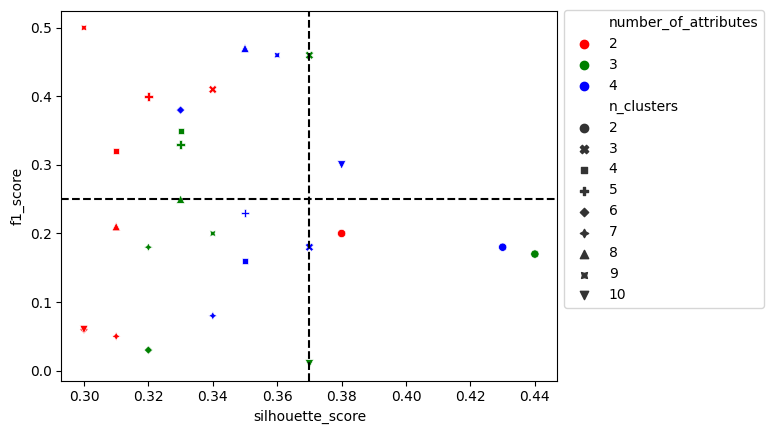

In [63]:
fig = sns.scatterplot(data=df_results,
                x='silhouette_score',
                y='f1_score',
                hue='number_of_attributes',
                palette={2:'red',3:'green',4:'blue'},
                style='n_clusters')
plt.axhline(y=.25, color='black', linestyle='--')
plt.axvline(x=.37, color='black', linestyle='--')
fig.legend(loc='center left', bbox_to_anchor=(1, .6), ncol=1)